In [1]:
import sys
base_dir = "/Users/gsa0081/Projects/anylytics"
if base_dir not in sys.path:
    sys.path.append(base_dir)
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from glob import glob
import matplotlib.pyplot as plt
from earth_colors.utils.common import fig
from scipy import ndimage
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from earth_colors.utils.STRTools import str_map, str_parallel, setTQDMNotebook, str_groupBy
from itertools import count
from tqdm import tqdm
import os
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("white")
setTQDMNotebook()

In [3]:
imagedir = "/Users/gsa0081/Projects/anylytics/earth_colors/images"
imageFiles = filter(lambda x: '201610' in x or '201606' in x, sorted(glob("%s/*.jpg" % imagedir)))
imageFiles_grouped = str_groupBy(imageFiles, key=lambda x: os.path.split(x)[1][0:6])

#images = (ndimage.imread(imageName,mode='RGB') for imageName in imageFiles)
#flattenedImages = (x.reshape((x.shape[0] * x.shape[1], 3)) for x in images)

In [4]:
len(imageFiles)

80

In [5]:
images_grouped = map(lambda x: (ndimage.imread(imageName,mode='RGB') for imageName in x), imageFiles_grouped.values())


In [9]:
imageFiles_grouped.keys()

['201610', '201606']

In [6]:
def flattenImages(images_for_group):
    return np.vstack(str_map(lambda image: image.reshape((image.shape[0] * image.shape[1], 3)))(images_for_group))
                    
flattenedImages_grouped = map(flattenImages, images_grouped)
                    
                    

In [7]:
flattenedImages_grouped[0].shape

(2174472, 3)

<IPython.core.display.Javascript object>


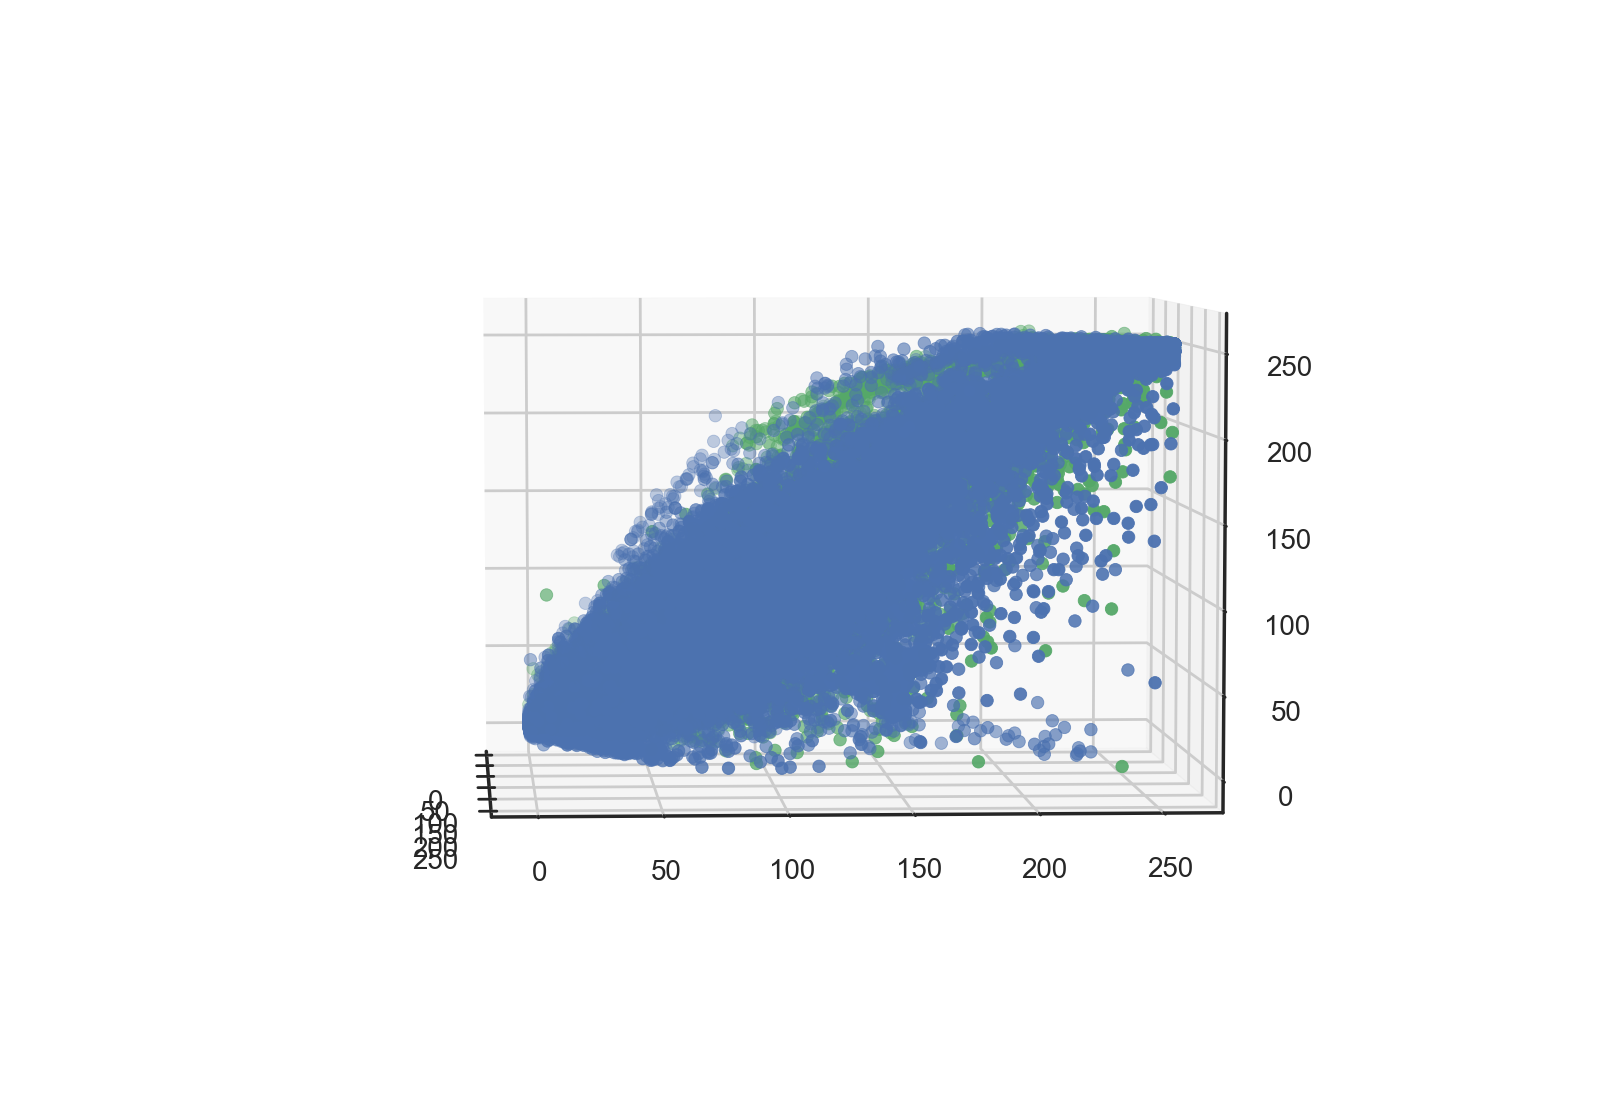

In [8]:
fig()
ax = plt.gca(projection='3d')
sr = 100
ax.scatter(flattenedImages_grouped[0][::sr,0],flattenedImages_grouped[0][::sr,1],flattenedImages_grouped[0][::sr,2])
ax.scatter(flattenedImages_grouped[1][::sr,0],flattenedImages_grouped[1][::sr,1],flattenedImages_grouped[1][::sr,2])

### Plot Stuff

In [17]:
test = images_grouped[0].next()

In [18]:
import cv2
test2 = cv2.cvtColor(test, cv2.COLOR_BGR2HSV)

<IPython.core.display.Javascript object>


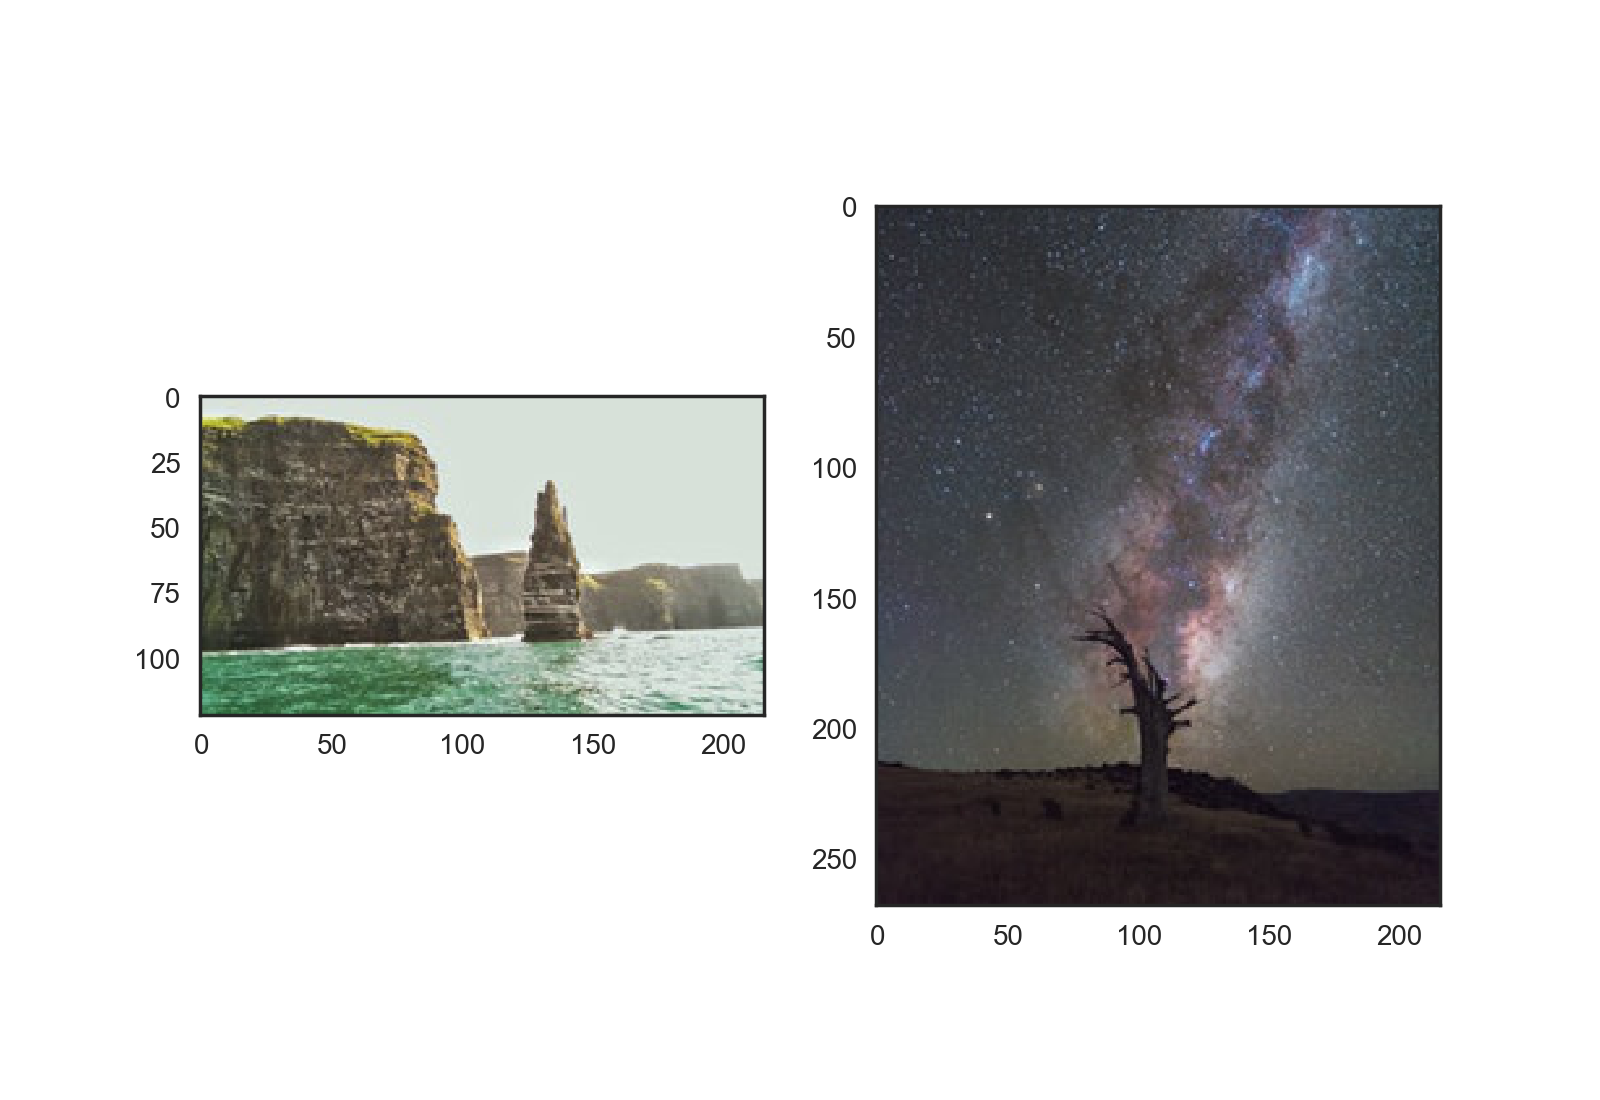

In [16]:
fig()
plt.subplot(1,2,1)
plt.imshow(images_grouped[0].next())
plt.subplot(1,2,2)
plt.imshow(images_grouped[1].next())